In [66]:
import numpy as np
import seaborn as sns
import pandas as pd

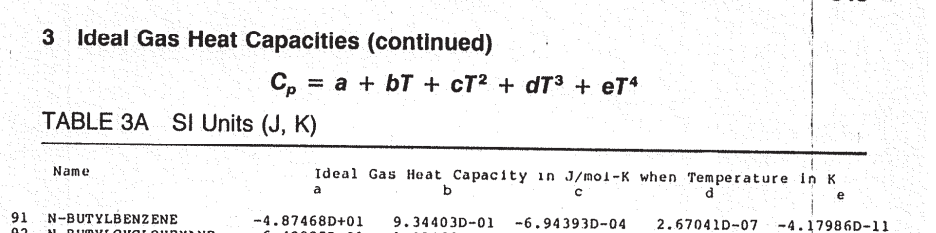

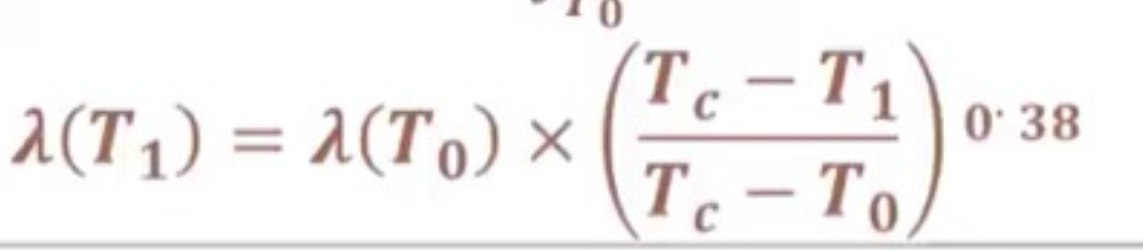

In [67]:
def H_ig(t_stream , t_ref , a , b , c , d, e): #kelvin   h--> joule/mole

    H_ideal = a*(t_stream - t_ref) + 0.5*b*(t_stream**2 - t_ref**2) + (1/3) * c * (t_stream**3 - t_ref**3) + 0.25*d * (t_stream**4 - t_ref**4) + (1/5)*e*(t_stream**5 - t_ref**5)
    return H_ideal

In [68]:
def lambda_nbp(latent_heat):
    return latent_heat

In [69]:
def lambda_transform(lambda_nbp_  , tc , NBP , t_ref):
    new_lambda = lambda_nbp_*  ( (tc - t_ref)/(tc - NBP)  )**0.38 #all t in deg c
    return new_lambda

In [70]:
lambda_transform(lambda_nbp_ = 5577.5

  , tc= -146.955


 , NBP= -195.8

 , t_ref= 25)

(3312.3814763461064+8366.12061471608j)

In [71]:
df = pd.read_excel("D:\graduation project\hysys\EB.xlsx" , sheet_name="cp_gas_coeff")

In [72]:
df.head()

,Component,A,B,C,D,E,Unnamed: 6,Latent heat (NBP)(jol/mol),T_critical(deg c),NBP,...,H2O,LE Cooled,Naphtha Cooled,Kerosee Cooled,CooledDiesel,Cooled Residue,Unnamed: 65,Temperature,Pressure,stream name
0,Hydrogen,17.6386,0.067005,-0.000131,1.058830e-07,2.918030e-11,NaN,1334.6,-239.710000,-252.5952,...,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,NaN,25.000000,1.0,Fresh CVGO
1,Nitrogen,29.4119,-0.003007,0.000005,5.131860e-09,-4.253080e-12,NaN,5577.5,-146.956000,-195.8002,...,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,NaN,25.000000,1.0,CVGO Feed
2,CO,29.0063,0.002492,-0.000019,4.798920e-08,-2.872660e-11,NaN,6065.3,-140.200995,-191.4504,...,3.090478e-33,0.192181,4.343889e-07,4.886820e-14,0.0,0.0,NaN,25.000000,1.0,.
3,Oxygen,29.8832,0.011384,0.000043,3.700820e-08,1.010060e-11,NaN,6820.5,-118.379996,-182.9504,...,1.899510e-35,0.192743,3.219110e-06,3.622627e-13,0.0,0.0,NaN,370.000000,2.0,Heated Feed
4,Methane,38.3870,-0.073664,0.000291,-2.638490e-07,8.006790e-11,NaN,8179.5,-82.450995,-161.5250,...,4.412781e-37,0.568337,7.013780e-05,7.893916e-12,0.0,0.0,NaN,375.387746,130.0,Pumped Feed


<Axes: >

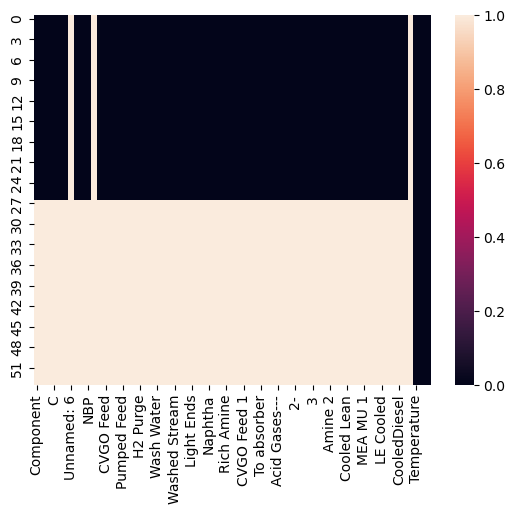

In [73]:
sns.heatmap(df.isna())

In [74]:
df_streams = df[["Temperature" , "Pressure" , "stream name"]]
df_streams

,Temperature,Pressure,stream name
0,25.000000,1.000000,Fresh CVGO
1,25.000000,1.000000,CVGO Feed
2,25.000000,1.000000,.
3,370.000000,2.000000,Heated Feed
4,375.387746,130.000000,Pumped Feed
5,378.474530,129.559040,To Cracker
6,371.857319,128.918501,HCR Eff
7,65.560000,130.000000,H2 Purge
8,100.000000,128.418501,HPS Vapours
9,100.000000,128.418501,HCR Liquids


In [75]:
rows = []
for i , j in enumerate(df["Component"]):
    rows.append(df["Component"][i])
rows = rows[0:27]
rows

['Hydrogen',
 'Nitrogen',
 'CO',
 'Oxygen',
 'Methane',
 'Ethylene',
 'Ethane',
 'CO2',
 'H2S',
 'Propene',
 'Propane',
 'Ammonia',
 'i-Butane',
 'i-Butene',
 '1-Butene',
 '13-Butadiene',
 'n-Butane',
 'tr2-Butene',
 'cis2-Butene',
 '22-Mpropane',
 'i-Pentane',
 '1-Pentene',
 '2M-1-butene',
 'n-Pentane',
 'H2O',
 'MEAmine',
 'EGlycol']

In [76]:
columns = []
for i , j in enumerate(df["stream name"]):
    columns.append(df["stream name"][i])

#columns = columns[0:54]
columns

['Fresh CVGO',
 'CVGO Feed',
 '.',
 'Heated Feed',
 'Pumped Feed',
 'To Cracker',
 'HCR Eff',
 'H2 Purge',
 'HPS Vapours',
 'HCR Liquids',
 'Wash Water',
 'Throttled Vapours',
 'Pumped WW',
 'Washed Stream',
 'Off Gases',
 'To Fractionator',
 'Light Ends',
 'Water',
 'Residue',
 'Naphtha',
 'Kerosene',
 'Diesel',
 'Rich Amine',
 'Lean Amine',
 'HCR Eff Cooled',
 'CVGO Feed 1',
 'MPS Liq',
 'Acid Gases--+',
 'To absorber',
 'LP Stream',
 'H2 MakeUp Feed',
 'Acid Gases---',
 'Sweet Gases',
 1,
 '2-',
 '2+',
 'H2 Feed',
 3,
 4,
 'Amine 1',
 'Amine 2',
 'Acid Gases',
 'Lean',
 'Cooled Lean',
 'Amine 4',
 'Amine 3',
 'MEA MU 1',
 'Amine Recycle',
 'H2O',
 'LE Cooled',
 'Naphtha Cooled',
 'Kerosee Cooled',
 'CooledDiesel',
 'Cooled Residue']

In [77]:
results = pd.DataFrame(columns = columns , index=rows )
results

,Fresh CVGO,CVGO Feed,.,Heated Feed,Pumped Feed,To Cracker,HCR Eff,H2 Purge,HPS Vapours,HCR Liquids,...,Amine 4,Amine 3,MEA MU 1,Amine Recycle,H2O,LE Cooled,Naphtha Cooled,Kerosee Cooled,CooledDiesel,Cooled Residue
Hydrogen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Nitrogen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Oxygen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Methane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ethylene,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ethane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CO2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H2S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Propene,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
df.columns

Index([                 'Component',                          'A',
                                'B',                          'C',
                                'D',                          'E',
                       'Unnamed: 6', 'Latent heat (NBP)(jol/mol)',
                'T_critical(deg c)',                        'NBP',
                      'Unnamed: 10',                 'Fresh CVGO',
                        'CVGO Feed',                          '.',
                      'Heated Feed',                'Pumped Feed',
                       'To Cracker',                    'HCR Eff',
                         'H2 Purge',                'HPS Vapours',
                      'HCR Liquids',                 'Wash Water',
                'Throttled Vapours',                  'Pumped WW',
                    'Washed Stream',                  'Off Gases',
                  'To Fractionator',                 'Light Ends',
                            'Water',                    'Resid

In [88]:
df_streams["Temperature"][0]

25.0

In [90]:
for i , j in enumerate(df_streams["stream name"]):

    t_stream = df_streams["Temperature"].iloc[i]
    #p_stream = df_streams["Pressure"].iloc[i]
    

    for l , k in enumerate(df["Component"]):
        tc = df["T_critical(deg c)"].iloc[l]
        nbp= df["NBP"].iloc[l]
        a=df["A"].iloc[l]
        b=df["B"].iloc[l]
        c=df["C"].iloc[l]
        d=df["D"].iloc[l]
        e=df["E"].iloc[l]


        n  = df.loc[l , j]

        lambda_nbp = df['Latent heat (NBP)(jol/mol)'].iloc[l]
        #lambda_tref= lambda_transform(lambda_nbp  , tc , nbp , 25)
        delta_H_ig = H_ig(t_stream+273.15 , 298.15 , a , b , c , d, e)
        #tot_H_ideal= n*(delta_H_ig + lambda_tref)  #kj/hr
        tot_H_ideal= n*(delta_H_ig + lambda_nbp)

        #h_res_ , z_vap , q , I , tr , alpha  , H_res_RT , error_ , dq_dtr   = H_residual('pr' , t_stream+273.15 , tc+273.15 , p_stream , pc  , Z_vap , beta_q  , w)

        results.loc[k , j] = tot_H_ideal


<Axes: >

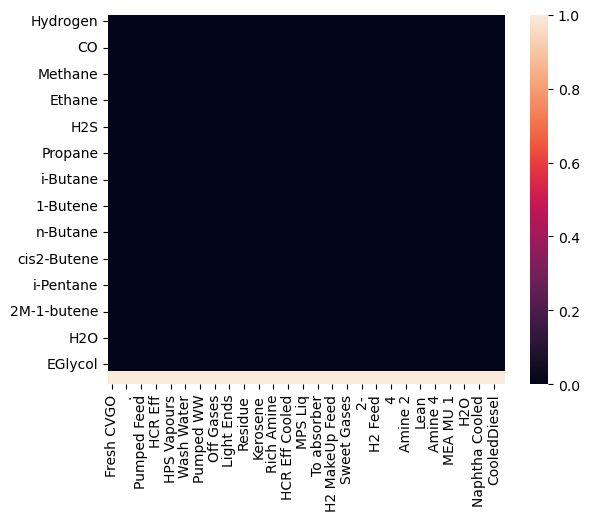

In [84]:
sns.heatmap(results.isna())

In [85]:
results

,Fresh CVGO,CVGO Feed,.,Heated Feed,Pumped Feed,To Cracker,HCR Eff,H2 Purge,HPS Vapours,HCR Liquids,...,Amine 4,Amine 3,MEA MU 1,Amine Recycle,H2O,LE Cooled,Naphtha Cooled,Kerosee Cooled,CooledDiesel,Cooled Residue
Hydrogen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Nitrogen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CO,0.0,0.0,0.0,0.0,0.0,2953.282526,4128.902603,0.39238,493.77078,1586.463837,...,0.0,0.0,0.0,0.0,0.0,1463.121903,0.002799,0.0,0.0,0.0
Oxygen,0.0,0.0,0.0,0.0,0.0,4177.176047,5798.475208,0.204666,451.677608,1895.161726,...,0.0,0.0,0.0,0.0,0.0,1719.060917,0.023568,0.0,0.0,0.0
Methane,0.0,0.0,0.0,0.0,0.0,13940.465907,15955.311093,0.199486,1134.759123,6248.733257,...,0.0,0.0,0.0,0.0,0.0,5765.092243,0.606683,0.0,0.0,0.0
Ethylene,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ethane,0.0,0.0,0.0,0.0,0.0,55519.683782,40890.093856,0.0,2329.518056,16949.395014,...,0.0,0.0,0.0,0.0,0.0,15752.047099,12.517604,0.000001,0.0,0.0
CO2,0.0,0.0,0.0,0.0,0.0,57052.341933,53263.251596,0.0,2375.633495,22994.389926,...,0.0,0.0,0.0,0.0,0.0,21409.056572,127.959243,0.000015,0.0,0.0
H2S,0.0,0.0,0.0,-0.0,-0.0,-2776542.323953,-2751115.995351,-0.0,-11962.708728,-155094.513793,...,-0.0,-0.0,-0.0,-0.0,-0.0,-86228.837024,-24.625215,-0.000135,-0.0,-0.0
Propene,0.0,0.0,0.0,0.0,0.0,157879.553908,171789.8286,0.0,4694.760132,82089.43019,...,0.0,0.0,0.0,0.0,0.0,57589.550122,19774.844481,0.003105,0.0,0.0


In [86]:
results.to_excel("D:/graduation project/hysys/ideal enthalpy for normal comp_trial 1 without lambda transform.xlsx")